In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import pandas as pd
import re
import scipy as sp
import scipy.stats as stats
from scipy.interpolate import interp1d

import stats13tools.stats13tools as st

%matplotlib inline

In [2]:
colors = {"orange": "#f0ad4e",
          "red": "#d9534f",
          "blue": "#5bc0de",
          "green": "#5cb85c",
          "gray": "#636c72",
          "lightgray": "#d2d2d2"
         }

# Scatter plot

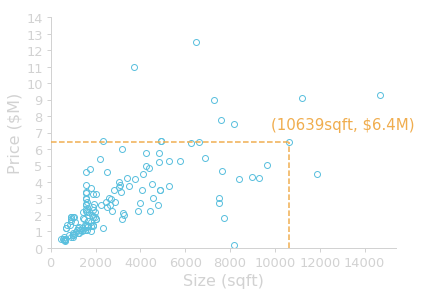

In [97]:
data = pd.read_csv("../zillow-srape/Zillow-master/2017-05-11_080145.csv")

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.15, 0.8, 0.8])
ax2 = ax1.twinx()

for ax in [ax1]:
    ax.plot(data.sqft, data.price, "o", mfc="none", mec=colors["blue"])
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Price ($M)", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("Size (sqft)", size=16, color=colors["lightgray"], ha="center")
    ticks = np.arange(0, 15000000, 1000000)
    ax.set_yticks(ticks)
    ax.set_yticklabels((ticks/1000000).astype(int))
    ax.set_ylim(0)
    ax.set_xlim(0)
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    data_point = data[data.sqft>10000].sort_values(by="sqft").iloc[0]
    ax.plot([data_point.sqft, data_point.sqft], [0, data_point.price], ls="--", color=colors["orange"])
    ax.plot([0, data_point.sqft], [data_point.price, data_point.price], ls="--", color=colors["orange"])
    ax.text(data_point.sqft-800, data_point.price+800000, "({:.0f}sqft, ${:.1f}M)".format(data_point.sqft, data_point.price/1000000),
            color=colors["orange"], size=15)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/correlation-scatterplot.svg", transparent=True)

# Bubble chart

In [134]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

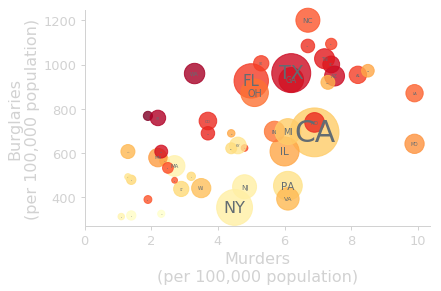

In [176]:
data = pd.read_csv("data-src/crimeRatesByState2005.csv")
data = data[data.state!="District of Columbia"]
data = data[data.state!="United States"]
data.head()

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.18, 0.22, 0.8, 0.75])
#ax2 = ax1.twinx()

for ax in [ax1]:
    ax.scatter(data.murder, data.burglary, c=data.larceny_theft, s=data.population/15000, clip_on=False,
              cmap=plt.cm.get_cmap('YlOrRd'), alpha=0.8)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Burglaries\n(per 100,000 population)", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("Murders\n(per 100,000 population)", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlim(0)
    for state in data.state:
        ax.text(data[data.state==state].murder, data[data.state==state].burglary, us_state_abbrev[state], 
                color=colors["gray"], ha="center", va="center", size=data[data.state==state].population/1200000)
    

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/correlation-bubble-chart.svg", transparent=True)

# Scatter plot multiple datasets

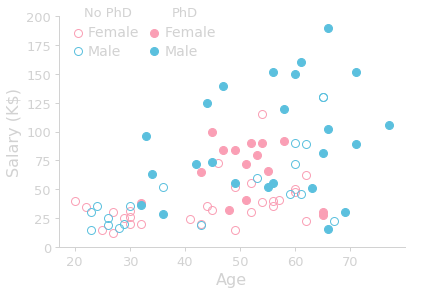

In [221]:
data = pd.read_csv("data-Lock5DataCSV/SalaryGender.csv")
data = data[data.Salary>10]

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.15, 0.8, 0.8])
ax2 = ax1.twinx()
#ax3 = ax1.twinx()

for ax in [ax1]:
    ax.plot(data[(data.Gender==0) & (data.PhD==0)].Age, data[(data.Gender==0) & (data.PhD==0)].Salary, "o", ms=8, mfc="none", mec="#fa9fb5",  label="Female", color="#fa9fb5")
    ax.plot(data[(data.Gender==0) & (data.PhD==1)].Age, data[(data.Gender==0) & (data.PhD==1)].Salary, "o", ms=8, label="Female", color="#fa9fb5")
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Salary (K$)", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("Age", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylim(0, 200)
    
    ax.text(26, 200, "No PhD", color=colors["lightgray"], ha="center", size=13)
    ax.text(40, 200, "PhD", color=colors["lightgray"], ha="center", size=13)
    
    leg1 = ax.legend(loc="upper left", ncol=2, frameon=False, facecolor="none", 
                      handletextpad=0, columnspacing=0.5, bbox_to_anchor=(0, 1))
    for text in leg1.get_texts():
        text.set_color(colors["lightgray"])
        text.set_size(14)

for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    ax.plot(data[(data.Gender==1) & (data.PhD==0)].Age, data[(data.Gender==1) & (data.PhD==0)].Salary, "o", ms=8, mfc="none", mec=colors["blue"],  label="Male", color="#fa9fb5", clip_on=False)
    ax.plot(data[(data.Gender==1) & (data.PhD==1)].Age, data[(data.Gender==1) & (data.PhD==1)].Salary, "o", ms=8, label="Male", color=colors["blue"], clip_on=False)
    leg1 = ax.legend(loc="upper left", ncol=2, frameon=False, facecolor="none", 
                      handletextpad=0, columnspacing=2.31, bbox_to_anchor=(0, 0.92))
    for text in leg1.get_texts():
        text.set_color(colors["lightgray"])
        text.set_size(14)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/correlation-scatter-multiple-datasets.svg", transparent=True)

# Correlation - Cars data

In [355]:
#DATASET CARS 2004    
with open("data-src/04cars.dat.txt",'r') as f:
    lines = [l.rstrip().split() for l in f]
    data_clean = []
    
    # extract name of car
    for line in lines:
        s1 = np.where((np.array(line)=="0")==True)[0]
        s2 = np.where((np.array(line)=="1")==True)[0]
        if (np.sum(s1)>0) & (np.sum(s2)>0):
            n = np.min([s1[0], s2[0]])
        elif (np.sum(s1)>0) & (np.sum(s2)==0):
            n = s1[0]
        elif (np.sum(s1)==0) & (np.sum(s2)>0):
            n = s2[0]
        else:
            print("no match")
        name = [" ".join(line[:n])] #concatenate name of car
        for element in line[n:]: #add all the params
            name.append(element)
        
        data_clean.append(name)
        
    
        data = pd.DataFrame(data_clean, 
                       columns=["Model", "SportCar", "SportUtility", "Wagon", "Minivan", "Pickup",
                              "AllWheelDrive", "RearWheelDrive", "RetailPrice", "DealerCost", "EngineSize", "Cylinders", "Horsepower",
                              "CityMPG", "HwyMPG", "Weight", "WheelBase", "Length", "Width"])

#data.head()

data= data.replace("*", np.nan)

In [4]:
#DATASET CARS 1993
with open("data-src/93cars.dat.txt",'r') as f:
    lines = [l.rstrip().split() for l in f]
    data = pd.DataFrame([lines[i-1]+lines[i] for i in range(1, len(lines), 2)], 
                       columns=["Manufacturer", "Model", "Type", "MinPrice", "MidPrice", "MaxPrice",
                              "CityMPG", "HwyMPG", "Airbag", "Drive", "Cylinders", "EngineSize", "Horsepower",
                              "RPM", "EngineRevolution", "ManualT", "FuelTankCap", "PassengerCap", "Length",
                              "Wheelbase", "Width", "UTurnSpace", "RearSeatRoom", "LuggageCap", "Weight",
                              "Domestic"])
    data = data.replace("*", np.nan)

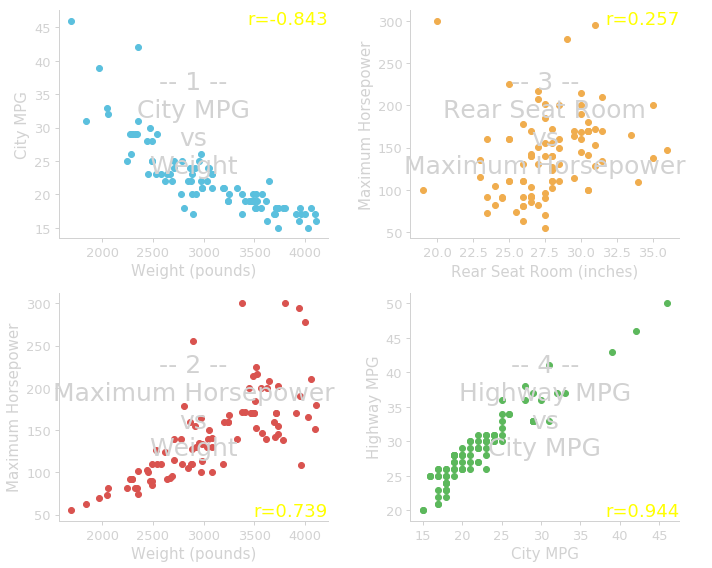

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(10,8))

ax5 = ax1.twinx()
ax6 = ax2.twinx()
ax7 = ax3.twinx()
ax8 = ax4.twinx()

ax9 = ax1.twinx()
ax10 = ax2.twinx()
ax11 = ax3.twinx()
ax12 = ax4.twinx()

for ax in [ax1]:
    ax.plot(data.Weight, data.CityMPG, "o", color=colors["blue"])
    ax.set_xlabel("Weight (pounds)", color=colors["lightgray"], size=15)
    ax.set_ylabel("City MPG", color=colors["lightgray"], size=15)
for ax in [ax5]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.5, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.5,
           "-- 1 --\nCity MPG\nvs\nWeight", ha="center", va="center", size=25, color=colors["lightgray"])
for ax in [ax9]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    ax.text(ax.get_xlim()[1], ax.get_ylim()[1], "r={:.3f}".format(np.corrcoef(data.Weight.astype(float), data.CityMPG.astype(float))[1,0]),
            ha="right", va="top", color="yellow", size=18)

for ax in [ax2]:
    ax.plot(data.RearSeatRoom, data.Horsepower, "o", color=colors["orange"])
    ax.set_xlabel("Rear Seat Room (inches)", color=colors["lightgray"], size=15)
    ax.set_ylabel("Maximum Horsepower", color=colors["lightgray"], size=15)
for ax in [ax6]:
    ax.axis("off")
    ax.set_ylim(ax2.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.5, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.5,
           "-- 3 --\nRear Seat Room\nvs\nMaximum Horsepower", ha="center", va="center", size=25, color=colors["lightgray"])
for ax in [ax10]:
    ax.axis("off")
    ax.set_ylim(ax2.get_ylim())
    ax.text(ax.get_xlim()[1], ax.get_ylim()[1], "r={:.3f}".format(np.corrcoef(data.RearSeatRoom.dropna().astype(float), data.Horsepower.ix[data.RearSeatRoom.dropna().index].astype(float))[1,0]),
            ha="right", va="top", color="yellow", size=18)
    
for ax in [ax3]:
    ax.plot(data.Weight, data.Horsepower, "o", color=colors["red"])
    ax.set_xlabel("Weight (pounds)", color=colors["lightgray"], size=15)
    ax.set_ylabel("Maximum Horsepower", color=colors["lightgray"], size=15)
for ax in [ax7]:
    ax.axis("off")
    ax.set_ylim(ax3.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.5, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.5,
           "-- 2 --\nMaximum Horsepower\nvs\nWeight", ha="center", va="center", size=25, color=colors["lightgray"])
for ax in [ax11]:
    ax.axis("off")
    ax.set_ylim(ax3.get_ylim())
    ax.text(ax.get_xlim()[1], ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.08, "r={:.3f}".format(np.corrcoef(data.Weight.astype(float), data.Horsepower.astype(float))[1,0]),
            ha="right", va="top", color="yellow", size=18)

for ax in [ax4]:
    ax.plot(data.CityMPG, data.HwyMPG, "o", color=colors["green"])
    ax.set_xlabel("City MPG", color=colors["lightgray"], size=15)
    ax.set_ylabel("Highway MPG", color=colors["lightgray"], size=15)
for ax in [ax8]:
    ax.axis("off")
    ax.set_ylim(ax4.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.5, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.5,
           "-- 4 --\nHighway MPG\nvs\nCity MPG", ha="center", va="center", size=25, color=colors["lightgray"])
for ax in [ax12]:
    ax.axis("off")
    ax.set_ylim(ax4.get_ylim())
    ax.text(ax.get_xlim()[1], ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.08, "r={:.3f}".format(np.corrcoef(data.CityMPG.astype(float), data.HwyMPG.astype(float))[1,0]),
            ha="right", va="top", color="yellow", size=18)

for ax in [ax1, ax2, ax3, ax4]:
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    
plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/correlation-car.svg", transparent=True)

# Correlation Caution

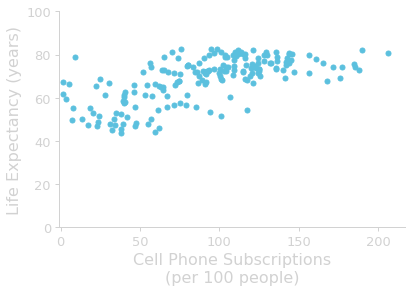

In [245]:
data = pd.read_csv("data-Lock5DataCSV/AllCountries.csv")

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.2, 0.8, 0.75])

for ax in [ax1]:
    ax.plot(data.Cell, data.LifeExpectancy, "o", ms=5, color=colors["blue"], clip_on=False)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Life Expectancy (years)", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("Cell Phone Subscriptions\n(per 100 people)", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylim(0, 100)
    ax.set_xlim(-1)
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/correlation-caution1.svg", transparent=True)

In [256]:
#data.Cell, data.LifeExpectancy
np.corrcoef(data[["Cell", "LifeExpectancy"]].dropna().Cell, data[["Cell", "LifeExpectancy"]].dropna().LifeExpectancy)[1,0]

0.65654473027602989

In [266]:
#DATASET CARS 1993
with open("data-src/93cars.dat.txt",'r') as f:
    lines = [l.rstrip().split() for l in f]
    data = pd.DataFrame([lines[i-1]+lines[i] for i in range(1, len(lines), 2)], 
                       columns=["Manufacturer", "Model", "Type", "MinPrice", "MidPrice", "MaxPrice",
                              "CityMPG", "HwyMPG", "Airbag", "Drive", "Cylinders", "EngineSize", "Horsepower",
                              "RPM", "EngineRevolution", "ManualT", "FuelTankCap", "PassengerCap", "Length",
                              "Wheelbase", "Width", "UTurnSpace", "RearSeatRoom", "LuggageCap", "Weight",
                              "Domestic"])
    data = data.replace("*", np.nan)




0.77194946068238035

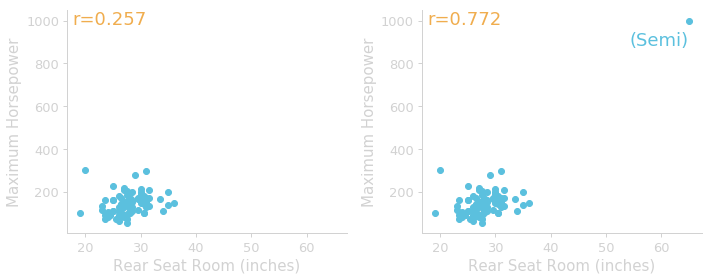

In [283]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

for ax in [ax2]:
    ax.plot(np.concatenate([data.RearSeatRoom.dropna().astype(float), [65]]), np.concatenate([data.Horsepower.ix[data.RearSeatRoom.dropna().index].astype(float), [1000]]), "o",
            color=colors["blue"])
    ax.set_xlabel("Rear Seat Room (inches)", color=colors["lightgray"], size=15)
    ax.set_ylabel("Maximum Horsepower", color=colors["lightgray"], size=15)
    ax.text(ax.get_xlim()[0]+1, ax.get_ylim()[1], "r={:.3f}".format(np.corrcoef(np.concatenate([data.RearSeatRoom.dropna().astype(float), [65]]), np.concatenate([data.Horsepower.ix[data.RearSeatRoom.dropna().index].astype(float), [1000]]))[1,0]),
            ha="left", va="top", color=colors["orange"], size=18)

    ax.text(65, 950, "(Semi)",
            ha="right", va="top", color=colors["blue"], size=18)


for ax in [ax1]:
    ax.set_ylim(ax2.get_ylim())
    ax.set_xlim(ax2.get_xlim())
    
    ax.plot(data.RearSeatRoom, data.Horsepower, "o", color=colors["blue"])
    ax.set_xlabel("Rear Seat Room (inches)", color=colors["lightgray"], size=15)
    ax.set_ylabel("Maximum Horsepower", color=colors["lightgray"], size=15)
    ax.text(ax.get_xlim()[0]+1, ax.get_ylim()[1], "r={:.3f}".format(np.corrcoef(data.RearSeatRoom.dropna().astype(float), data.Horsepower.ix[data.RearSeatRoom.dropna().index].astype(float))[1,0]),
            ha="left", va="top", color=colors["orange"], size=18)
    

    
for ax in [ax1, ax2]:
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)

plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/correlation-caution3.svg", transparent=True)

# Body tempearture and HR

In [292]:
#pd.read_clipboard().to_csv("data-src/footlength-height.csv", index=False)

In [329]:
np.corrcoef(data.height, data.footlength[idx_shuffle])

array([[ 1.        , -0.18471098],
       [-0.18471098,  1.        ]])

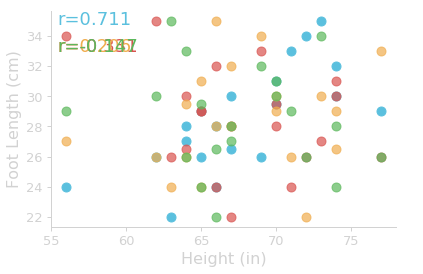

In [49]:
#data = pd.read_csv("data-Lock5DataCSV/BodyTemp50.csv")
data = pd.read_csv("data-src/footlength-height.csv")

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.2, 0.8, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

for ax in [ax1]:
    ax.plot(data.height, data.footlength, "o", ms=9, color=colors["blue"], clip_on=False)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Foot Length (cm)", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("Height (in)", size=16, color=colors["lightgray"], ha="center")
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.02, ax.get_ylim()[1], "r={:.3f}".format(np.corrcoef(data.height, data.footlength)[1,0]),
            ha="left", va="top", color=colors["blue"], size=18)

for ax in [ax2]:
    idx_shuffle = np.arange(len(data))
    np.random.shuffle(idx_shuffle)
    ax.plot(data.height, data.footlength[idx_shuffle], "o", ms=9, color=colors["red"], alpha=0.7, clip_on=False)
    ax.set_ylim(ax1.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.02, ax.get_ylim()[1]*0.95, "r={:.3f}".format(np.corrcoef(data.height, data.footlength[idx_shuffle])[1,0]),
            ha="left", va="top", color=colors["red"], size=18)
    ax.axis("off")

for ax in [ax3]:
    idx_shuffle = np.arange(len(data))
    np.random.shuffle(idx_shuffle)
    ax.plot(data.height, data.footlength[idx_shuffle], "o", ms=9, color=colors["orange"], alpha=0.7, clip_on=False)
    ax.set_ylim(ax1.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.02, ax.get_ylim()[1]*0.95, "r={:.3f}".format(np.corrcoef(data.height, data.footlength[idx_shuffle])[1,0]),
            ha="left", va="top", color=colors["orange"], size=18)
    ax.axis("off")

for ax in [ax4]:
    idx_shuffle = np.arange(len(data))
    np.random.shuffle(idx_shuffle)
    ax.plot(data.height, data.footlength[idx_shuffle], "o", ms=9, color=colors["green"], alpha=0.7, clip_on=False)
    ax.set_ylim(ax1.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.02, ax.get_ylim()[1]*0.95, "r={:.3f}".format(np.corrcoef(data.height, data.footlength[idx_shuffle])[1,0]),
            ha="left", va="top", color=colors["green"], size=18)
    ax.axis("off")

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/correlation-simulation-graph.svg", transparent=True)

# Simulation null hypothesis

In [307]:
n_simul = 10000
res_r = np.zeros(n_simul) #store the data

x = data.height.copy().values
y = data.footlength.copy().values

original_r = np.corrcoef(x, y)[1,0]

for i in range(n_simul):
    np.random.shuffle(y)
    res_r[i] = np.corrcoef(x, y)[1,0]

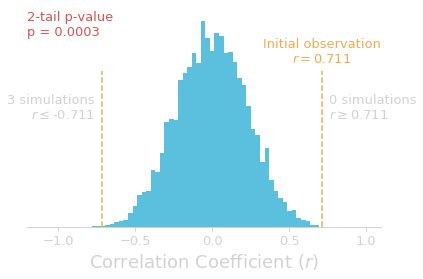

In [342]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
    
for ax in [ax1]:
    ax.hist(res_r, bins="auto", color=colors["blue"])
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel('Correlation Coefficient ($r$)', size=18, color=colors["lightgray"])
    ax.set_xlim(-1.2, 1.1)
    ax.set_ylim(0)
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(original_r, ymax=0.72, color=colors["orange"], ls="--")
    ax.text(original_r, ax.get_ylim()[1]*0.76, "Initial observation\n" "$r={:.3f}$".format(original_r), color=colors["orange"], size=13, ha="center")
    ax.axis("off")
    
for ax in [ax3]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(0-original_r, ymax=0.72, color=colors["orange"], ls="--")
    ax.text(original_r+0.05, ax.get_ylim()[1]*0.5, "{:.0f} simulations\n$r\geq${:.3f}".format(np.sum(res_r>=original_r), original_r), color=colors["lightgray"], size=13, ha="left")
    ax.text(0-original_r-0.05, ax.get_ylim()[1]*0.5, "{:.0f} simulations\n$r\leq${:.3f}".format(np.sum(res_r<=0-original_r), 0-original_r), color=colors["lightgray"], size=13, ha="right")
    n_extreme = np.sum(res_r<=0-original_r)+np.sum(res_r>=original_r)
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*1, "2-tail p-value\np = {:.4f}".format(n_extreme/10000), color=colors["red"], size=13, ha="left", va="top")
    ax.axis("off")
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/correlation-simulation-nhst.svg", transparent=True)

## Simulation 95% confidence intervals

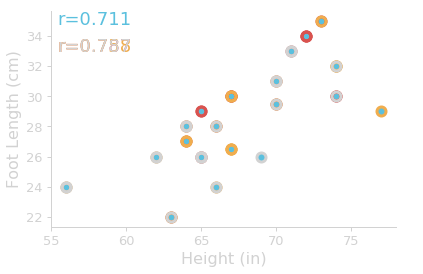

In [50]:
#data = pd.read_csv("data-Lock5DataCSV/BodyTemp50.csv")
data = pd.read_csv("data-src/footlength-height.csv")

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.2, 0.8, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()

for ax in [ax1]:
    ax.plot(data.height, data.footlength, "o", ms=9, color=colors["blue"], clip_on=False)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Foot Length (cm)", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("Height (in)", size=16, color=colors["lightgray"], ha="center")
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.02, ax.get_ylim()[1], "r={:.3f}".format(np.corrcoef(data.height, data.footlength)[1,0]),
            ha="left", va="top", color=colors["blue"], size=18)

for ax in [ax2]:
    boot_idx = np.random.choice(np.arange(len(data)), size=len(data))
    ax.plot(data.height.iloc[boot_idx], data.footlength.iloc[boot_idx], "o", ms=9, mew=3, mfc="none", mec=colors["red"], clip_on=False)
    ax.set_ylim(ax1.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.02, ax.get_ylim()[1]*0.95, "r={:.3f}".format(np.corrcoef(data.height.iloc[boot_idx], data.footlength.iloc[boot_idx])[1,0]),
            ha="left", va="top", color=colors["red"], size=18)
    ax.axis("off")

for ax in [ax3]:
    boot_idx = np.random.choice(np.arange(len(data)), size=len(data))
    ax.plot(data.height.iloc[boot_idx], data.footlength.iloc[boot_idx], "o", ms=9, mew=3, mfc="none", mec=colors["orange"], clip_on=False)
    ax.set_ylim(ax1.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.02, ax.get_ylim()[1]*0.95, "r={:.3f}".format(np.corrcoef(data.height.iloc[boot_idx], data.footlength.iloc[boot_idx])[1,0]),
            ha="left", va="top", color=colors["orange"], size=18)
    ax.axis("off")

for ax in [ax4]:
    boot_idx = np.random.choice(np.arange(len(data)), size=len(data))
    ax.plot(data.height.iloc[boot_idx], data.footlength.iloc[boot_idx], "o", ms=9, mfc="none", mew=3, mec=colors["lightgray"], clip_on=False)
    ax.set_ylim(ax1.get_ylim())
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.02, ax.get_ylim()[1]*0.95, "r={:.3f}".format(np.corrcoef(data.height.iloc[boot_idx], data.footlength.iloc[boot_idx])[1,0]),
            ha="left", va="top", color=colors["lightgray"], size=18)
    ax.axis("off")

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/correlation-simulation-ci95-steps.svg", transparent=True)

In [347]:
n_simul = 10000
res_rci = np.zeros(n_simul) #store the data

for i in range(n_simul):
    boot_idx = np.random.choice(np.arange(len(data)), size=len(data))
    res_rci[i] = np.corrcoef(data.height.iloc[boot_idx], data.footlength.iloc[boot_idx])[1,0]

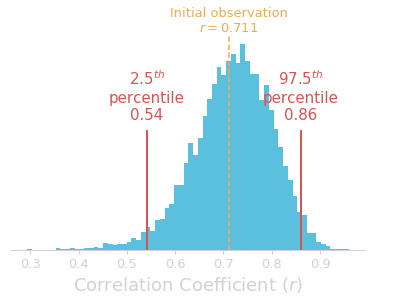

In [349]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
    
for ax in [ax1]:
    ax.hist(res_rci, bins="auto", color=colors["blue"])
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel('Correlation Coefficient ($r$)', size=18, color=colors["lightgray"])
    #ax.set_xlim(-7, 7)
    #ax.set_ylim(0)
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(original_r, color=colors["orange"], ls="--")
    ax.text(original_r, ax.get_ylim()[1]*1.01, "Initial observation\n" "$r={:.3f}$".format(original_r), color=colors["orange"], size=13, ha="center")
    ax.axis("off")

for ax in [ax3]:
    ax.axvline(np.percentile(res_rci, 2.5), ymax=0.55, color=colors["red"], lw=2)
    ax.axvline(np.percentile(res_rci, 97.5), ymax=0.55, color=colors["red"], lw=2)
    ax.text(np.percentile(res_rci, 2.5), ax.get_ylim()[1]*0.6, "2.5$^{{th}}$\npercentile\n{:.2f}".format(np.percentile(res_rci, 2.5)), color=colors["red"], size=15, ha="center")
    ax.text(np.percentile(res_rci, 97.5), ax.get_ylim()[1]*0.6, "97.5$^{{th}}$\npercentile\n{:.2f}".format(np.percentile(res_rci, 97.5)), color=colors["red"], size=15, ha="center")
    ax.axis("off")


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/correlation-simulation-ci95.svg", transparent=True)

# Correlation swap

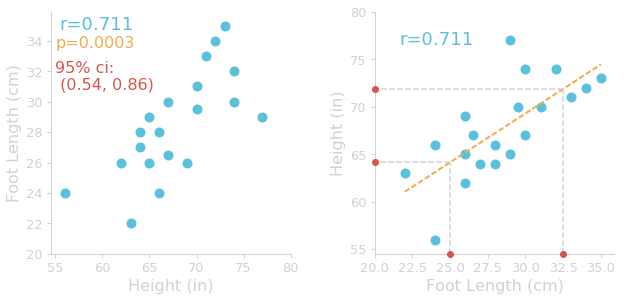

In [26]:
data = pd.read_csv("data-src/footlength-height.csv")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9, 4))

ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax2.twinx()
ax6 = ax2.twinx()

for ax in [ax1]:
    ax.plot(data.height, data.footlength, "o", ms=9, color=colors["blue"], clip_on=False)
    ax.set_ylabel("Foot Length (cm)", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("Height (in)", size=16, color=colors["lightgray"], ha="center")
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.02, ax.get_ylim()[1], "r={:.3f}".format(np.corrcoef(data.height, data.footlength)[1,0]),
            ha="left", va="top", color=colors["blue"], size=18)
    ax.set_ylim(20, 35.9)
    ax.set_xlim(54.5, 80)

for ax in [ax2]:
    ax.plot(data.footlength, data.height, "o", ms=9, color=colors["blue"], clip_on=False)
    ax.set_xlabel("Foot Length (cm)", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylabel("Height (in)", size=16, color=colors["lightgray"], ha="center")
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.02, ax.get_ylim()[1], "r={:.3f}".format(np.corrcoef(data.footlength, data.height)[1,0]),
            ha="left", va="top", color=colors["blue"], size=18)
    ax.set_xlim(ax1.get_ylim())
    ax.set_ylim(ax1.get_xlim())

for ax in [ax1, ax2]:
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)

for ax in [ax3]:
    ax.axis("off")
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.02, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9, "p=0.0003",
            ha="left", va="top", color=colors["orange"], size=16)
    
for ax in [ax4]:
    ax.axis("off")
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.02, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.80, "95% ci:\n (0.54, 0.86)",
            ha="left", va="top", color=colors["red"], size=16)

for ax in [ax5]:
    ax.set_ylim(ax2.get_ylim())
    ax.axis("off")
    params = np.polyfit(data.footlength, data.height, 1)
    xfit = np.array([data.footlength.min(), data.footlength.max()])
    ax.plot(xfit, np.polyval(params, xfit), "--", color=colors["orange"], lw=2)

for ax in [ax6]:
    ax.set_ylim(ax2.get_ylim())
    ax.axis("off")
    xvals = [25, 32.5]
    yvals = np.polyval(params, xvals)
    for xval,yval in zip(xvals, yvals):
        ax.plot([xval, xval], [ax.get_ylim()[0], yval], "--", color=colors["lightgray"])
        ax.plot([xval, ax.get_xlim()[0]], [yval, yval], "--", color=colors["lightgray"])
        ax.plot(ax.get_xlim()[0], yval, "o", color=colors["red"], clip_on=False)
        ax.plot(xval, ax.get_ylim()[0], "o", color=colors["red"], clip_on=False)


plt.subplots_adjust(left=0.1, bottom=0.14, right=0.97, top=0.98,
                wspace=0.35, hspace=None)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/correlation-simulation-graph-swap.svg", transparent=True)

# Regression

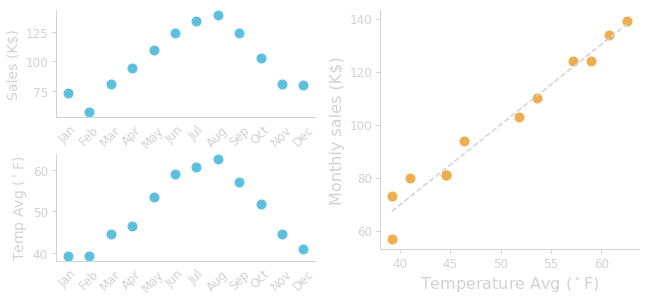

In [100]:
ice_cream = {"Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
             "Temp_avg": [4, 4, 7, 8, 12, 15, 16, 17, 14, 11, 7, 5],
             "Sales": [73, 57, 81, 94, 110, 124, 134, 139, 124, 103, 81, 80]}

def c_to_f(data):
    return 9.0/5.0 * data + 32

ice_cream["Temp_avg_f"] = c_to_f(np.array(ice_cream["Temp_avg"]))

fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_axes([0.08, 0.6, 0.4, 0.37])
ax2 = fig.add_axes([0.08, 0.1, 0.4, 0.37])
ax3 = fig.add_axes([0.58, 0.14, 0.4, 0.83])

for ax in [ax1]:
    ax.plot(ice_cream["Sales"], "o", ms=9, color=colors["blue"])
    ax.set_ylabel("Sales (K$)", size=14, color=colors["lightgray"], ha="center")
    ax.set_xticks(np.arange(len(ice_cream["Sales"])))
    ax.set_xticklabels(ice_cream["Month"], rotation=45)

for ax in [ax2]:
    ax.plot(ice_cream["Temp_avg_f"], "o", ms=9, color=colors["blue"])
    ax.set_ylabel("Temp Avg ($^\circ$F)", size=14, color=colors["lightgray"], ha="center")
    ax.set_xticks(np.arange(len(ice_cream["Temp_avg"])))
    ax.set_xticklabels(ice_cream["Month"], rotation=45)

for ax in [ax3]:
    params = np.polyfit(ice_cream["Temp_avg_f"], ice_cream["Sales"], 1)
    xfit = [np.min(ice_cream["Temp_avg_f"]), np.max(ice_cream["Temp_avg_f"])]
    ax.plot(ice_cream["Temp_avg_f"], ice_cream["Sales"], "o", ms=9, color=colors["orange"])
    ax.plot(xfit, np.polyval(params, xfit), "--", color=colors["lightgray"])
    ax.set_xlabel("Temperature Avg ($^\circ$F)", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylabel("Monthly sales (K$)", size=16, color=colors["lightgray"], ha="center")
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=12, pad=4)

for ax in [ax1, ax2]:
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=12, pad=4)
    ax.tick_params(axis="x", width=1, size=0, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=12, pad=6)


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/regression-ex-ice-cream.svg", transparent=True)

# Regression line

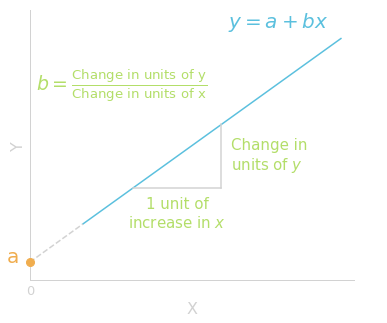

In [141]:
data = pd.DataFrame({
    "x": [15.840558, 12.961619, 25.263988, 43.0241, 50.974785, 82.80988, 90.603714, 73.73984],
    "y": [5.3056026, 23.242449, 38.408398, 31.917654, 53.391132, 59.3171, 80.69876, 96.96029]
    })

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_axes([0.06, 0.2, 0.9, 0.75])

ax2 = ax1.twinx()
ax3 = ax1.twinx()

for ax in [ax1]:
    #ax.scatter(data.x, data.y, s=100, c=colbrew)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=0, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=0)

    ax.set_xlim(-10, 100)
    ax.set_ylim(-10, 100)
    ax.set_yticks([])
    ax.set_xticks([-10])
    ax.set_xticklabels(["{:.0f}".format(0)])
    
    ax.set_ylabel("Y", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("X", size=16, color=colors["lightgray"], ha="center")
    
    xfit = [data.x.min()-5, data.x.max()+5]
    params = np.polyfit(data.x, data.y, 1)
    ax.plot(xfit, np.polyval(params, xfit), color=colors["blue"])
    
    ax.text(ax.set_xlim()[1]-(ax.set_xlim()[1] - ax.set_xlim()[0])*0.08, ax.get_ylim()[1], "$y=a+bx$", size=20, color=colors["blue"],
            ha="right", va="top")

for ax in [ax2]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    ax.plot([ax.set_xlim()[0], xfit[0]], np.polyval(params, [ax.set_xlim()[0], xfit[0]]), ls="--", color=colors["lightgray"])
    ax.plot(ax.set_xlim()[0], np.polyval(params, ax.set_xlim()[0]), "o", ms=8, color=colors["orange"], clip_on=False)
    ax.text(ax.set_xlim()[0]-(ax.set_xlim()[1] - ax.set_xlim()[0])*0.07, np.polyval(params, ax.set_xlim()[0]), 
            "a", size=20, color=colors["orange"])
    
for ax in [ax3]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    
    xvals = [25, 55]
    yvals = np.polyval(params, xvals)
    ax.plot(xvals, [yvals[0], yvals[0]], ls="-", color=colors["lightgray"])
    ax.plot([xvals[1], xvals[1]], yvals, ls="-", color=colors["lightgray"])
    
    col = "#b3de69"#, "#fccde5"
    ax.text(np.median(xvals), np.polyval(params, xvals[0])-(ax.set_ylim()[1] - ax.set_ylim()[0])*0.03,
            "1 unit of\nincrease in $x$", size=15, color=col, ha="center", va="top")
    ax.text(xvals[1]+(ax.set_xlim()[1] - ax.set_xlim()[0])*0.03, np.median(np.polyval(params, xvals)),
            "Change in\nunits of $y$", size=15, color=col, ha="left", va="center")
    ax.text(xvals[0]-(ax.set_xlim()[1] - ax.set_xlim()[0])*0.3, np.polyval(params, xvals[0])++(ax.set_ylim()[1] - ax.set_ylim()[0])*0.45,
            r"$b=\frac{\mathrm{Change\ in\ units\ of\ y}}{\mathrm{Change\ in\ units\ of\ x}}$", size=19, color=col, ha="left", va="top")

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/regression-line.svg", transparent=True)



# Least square

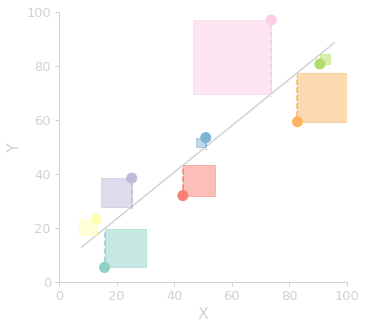

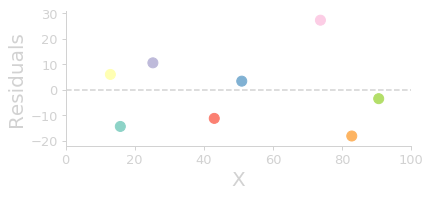

In [150]:
data = pd.DataFrame({
    "x": [15.840558, 12.961619, 25.263988, 43.0241, 50.974785, 82.80988, 90.603714, 73.73984],
    "y": [5.3056026, 23.242449, 38.408398, 31.917654, 53.391132, 59.3171, 80.69876, 96.96029]
    })

#colbrew = ["#fbb4ae", "#b3cde3", "#ccebc5", "#decbe4", "#fed9a6",
#           "#ffffcc", "#e5d8bd", "#fddaec"]

colbrew = ["#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#80b1d3",
           "#fdb462", "#b3de69", "#fccde5"]


### MAIN GRAPH
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_axes([0.15, 0.2, 0.8, 0.75])
ax3 = ax1.twinx()
ax2 = ax1.twinx()

for ax in [ax1]:
    ax.scatter(data.x, data.y, s=100, c=colbrew)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_ylabel("Y", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("X", size=16, color=colors["lightgray"], ha="center")
    
    xfit = [data.x.min()-5, data.x.max()+5]
    params = np.polyfit(data.x, data.y, 1)
    ax.plot(xfit, np.polyval(params, xfit), color=colors["lightgray"])
    
for ax in [ax2]:
    ax.axis("off")
    xline = np.polyval(params, data.x)
    for i in range(len(data)):
        ax.plot([data.ix[i].x, data.ix[i].x], [data.ix[i].y, xline[i]], ls="--", color=colbrew[i])
    
for ax in [ax3]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    patches_list = []
    for i in range(len(data)):
        if data.ix[i].y>=xline[i]:
            #if data point above, lower left is not point
            side = (data.ix[i].y-xline[i])
            lw_x, lw_y = (data.ix[i].x-side), (data.ix[i].y-side)
        else:
            #if data point below, lower left is the point
            side = xline[i]-data.ix[i].y
            lw_x, lw_y = data.ix[i].x, data.ix[i].y
        patches_list.append(patches.Rectangle((lw_x, lw_y), side, side))
    patches_col = PatchCollection(patches_list, alpha=0.5)
    patches_col.set_color(colbrew)
    ax.add_collection(patches_col)


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/regression-least-square.svg", transparent=True)


### RESIDUALS
fig = plt.figure(figsize=(6,2.5))
ax1 = fig.add_axes([0.15, 0.22, 0.8, 0.75])

for ax in [ax1]:
    ax.scatter(data.x, data.y-xline, s=100, c=colbrew)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlim(0, 100)
    ax.set_ylim(-22, 31)
    ax.set_yticks(np.arange(-20, 31, 10))
    ax.set_ylabel("Residuals", size=20, color=colors["lightgray"], ha="center")
    ax.set_xlabel("X", size=20, color=colors["lightgray"], ha="center")
    ax.axhline(0, ls="--", color=colors["lightgray"])
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/regression-residuals.svg", transparent=True)

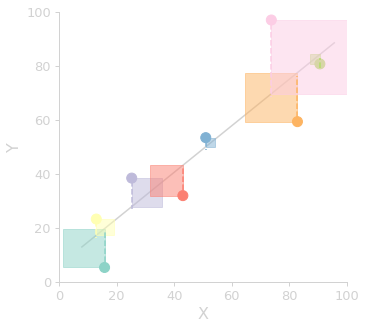

In [5]:
data = pd.DataFrame({
    "x": [15.840558, 12.961619, 25.263988, 43.0241, 50.974785, 82.80988, 90.603714, 73.73984],
    "y": [5.3056026, 23.242449, 38.408398, 31.917654, 53.391132, 59.3171, 80.69876, 96.96029]
    })

colbrew = ["#fbb4ae", "#b3cde3", "#ccebc5", "#decbe4", "#fed9a6",
           "#ffffcc", "#e5d8bd", "#fddaec"]

colbrew = ["#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#80b1d3",
           "#fdb462", "#b3de69", "#fccde5"]


fig = plt.figure(figsize=(5,5))
ax1 = fig.add_axes([0.15, 0.2, 0.8, 0.75])
ax3 = ax1.twinx()
ax2 = ax1.twinx()

for ax in [ax1]:
    ax.scatter(data.x, data.y, s=100, c=colbrew)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_ylabel("Y", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("X", size=16, color=colors["lightgray"], ha="center")
    
    xfit = [data.x.min()-5, data.x.max()+5]
    params = np.polyfit(data.x, data.y, 1)
    ax.plot(xfit, np.polyval(params, xfit), color=colors["lightgray"])
    
for ax in [ax2]:
    ax.axis("off")
    xline = np.polyval(params, data.x)
    for i in range(len(data)):
        ax.plot([data.ix[i].x, data.ix[i].x], [data.ix[i].y, xline[i]], ls="--", color=colbrew[i])
    
for ax in [ax3]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    patches_list = []
    for i in range(len(data)):
        if data.ix[i].y>=xline[i]:
            #if data point above, lower left is not point
            side = (data.ix[i].y-xline[i])
            lw_x, lw_y = data.ix[i].x, xline[i]
        else:
            #if data point below, lower left is the point
            side = xline[i]-data.ix[i].y
            lw_x, lw_y = data.ix[i].x-side, data.ix[i].y
        patches_list.append(patches.Rectangle((lw_x, lw_y), side, side))
    patches_col = PatchCollection(patches_list, alpha=0.5)
    patches_col.set_color(colbrew)
    ax.add_collection(patches_col)


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/regression-least-square-v2.svg", transparent=True)

# Least squares vs MAD

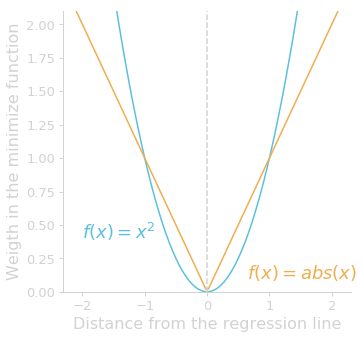

In [174]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_axes([0.16, 0.2, 0.8, 0.78])
#ax3 = ax1.twinx()

xfit = np.linspace(-2.1, 2.1, 100)

for ax in [ax1]:
    ax.plot(xfit, xfit**2, color=colors["blue"])
    ax.plot(xfit, np.abs(xfit), color=colors["orange"])
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Weigth in the minimize function", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("Distance from the regression line", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylim(0, 2.1)
    ax.axvline(0, ls="--", color=colors["lightgray"])
    ax.text(-2, 0.4, "$f(x)=x^2$", color=colors["blue"], ha="left", size=18)
    ax.text(2.4, 0.1, "$f(x)=abs(x)$", color=colors["orange"], ha="right", size=18)
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/regression-least-square-vs-mad.svg", transparent=True)

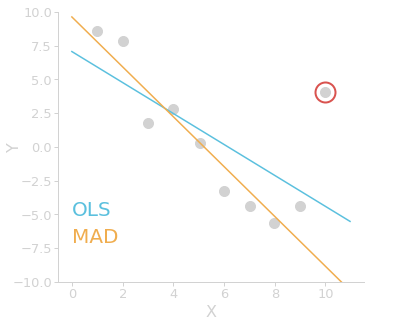

In [232]:
data = pd.DataFrame({
    "x": [0.9912101, 1.991552, 2.9944277, 3.9939117, 5.031269, 5.9847775, 7.0094004, 7.9858966, 8.99735, 9.969228],
    "y": [8.55867, 7.807588, 1.7461299, 2.8335004, 0.2770068, -3.308909, -4.4189773, -5.66825, -4.4139504, 4.072536]
    })

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_axes([0.14, 0.2, 0.85, 0.75])
ax2 = ax1.twinx()

for ax in [ax1]:
    ax.scatter(data.x, data.y, s=100, c=colors["lightgray"])
    ax.plot(data.x.values[-1], data.y.values[-1], "o", ms=20, mfc="none", linestyle='--', mec=colors["red"], mew=2)
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=2)
    #ax.set_xlim(0, 100)
    ax.set_ylim(-10, 10)
    ax.set_ylabel("Y", size=16, color=colors["lightgray"], ha="center", labelpad=-10)
    ax.set_xlabel("X", size=16, color=colors["lightgray"], ha="center")
    
    xfit = [data.x.min()-1, data.x.max()+1]
    params = np.polyfit(data.x, data.y, 1)
    ax.plot(xfit, np.polyval(params, xfit), color=colors["blue"])
    ax.text(0, ax.set_ylim()[0]+(ax.set_ylim()[1] - ax.set_ylim()[0])*0.3,
            "OLS", size=20, color=colors["blue"], ha="left", va="top")
    
for ax in [ax2]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    
    from sklearn import linear_model
    # Robustly fit linear model with RANSAC algorithm
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
    model_ransac.fit(data.x.values.reshape(-1, 1), data.y.values.reshape(-1, 1))
    
    ax.plot(xfit, model_ransac.predict(np.array(xfit).reshape(-1, 1)), color=colors["orange"])
    ax.text(0, ax.set_ylim()[0]+(ax.set_ylim()[1] - ax.set_ylim()[0])*0.2,
            "MAD", size=20, color=colors["orange"], ha="left", va="top")

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/regression-least-square-vs-mad-fit.svg", transparent=True)


# Olympics time 100m

In [6]:
data = pd.read_excel("data-src/olympics-winning-times-100m.xlsx")
data.head()

,olympic_year,men_winning_time,women_winning_time
0,1900,11.0,NaN
1,1904,11.0,NaN
2,1908,10.8,NaN
3,1912,10.8,NaN
4,1916,NaN,NaN


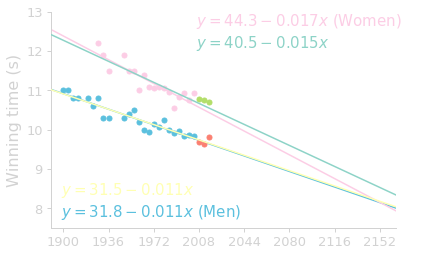

In [60]:
data_full = pd.read_excel("data-src/olympics-winning-times-100m.xlsx")

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.2, 0.8, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
ax6 = ax1.twinx()

for ax in [ax1]:
    data = data_full[data_full.olympic_year<2005]
    ax.plot(data.olympic_year, data.men_winning_time, "o", ms=5, color=colors["blue"])
    ax.plot(data.olympic_year, data.women_winning_time, "o", ms=5, color="#fccde5") #"#fdb462", "#b3de69", "#fccde5"
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Winning time (s)", size=16, color=colors["lightgray"], ha="center")
    ax.set_ylim(7.5, 13)
    ax.set_xlim(1890, 2165)
    ax.set_xticks(np.arange(1900, 2165, 4)[::9])
    
    #regressions
    xfit=[v for v in ax.get_xlim()]
    lr_men = np.polyfit(data.iloc[data.men_winning_time.dropna().index].olympic_year, data.men_winning_time.dropna(), 1)
    lr_women = np.polyfit(data.iloc[data.women_winning_time.dropna().index].olympic_year, data.women_winning_time.dropna(), 1)
    
    ax.plot(xfit, np.polyval(lr_men, xfit), color=colors["blue"])
    ax.plot(xfit, np.polyval(lr_women, xfit), color="#fccde5")
    
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.42, ax.get_ylim()[1], "$y={:.1f}{:.3f}x$ (Women)".format(lr_women[1], lr_women[0]),
            ha="left", va="top", color="#fccde5", size=15)
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.03, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.03, "$y={:.1f}{:.3f}x$ (Men)".format(lr_men[1], lr_men[0]),
            ha="left", va="bottom", color=colors["blue"], size=15)
    

for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    ax.plot(data_full[data_full.olympic_year==2008], data_full[data_full.olympic_year==2008].men_winning_time, "o", ms=5, color="#fb8072")
    ax.plot(data_full[data_full.olympic_year==2008], data_full[data_full.olympic_year==2008].women_winning_time, "o", ms=5, color="#b3de69")

for ax in [ax3]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    ax.plot(data_full[data_full.olympic_year==2012], data_full[data_full.olympic_year==2012].men_winning_time, "o", ms=5, color="#fb8072")
    ax.plot(data_full[data_full.olympic_year==2012], data_full[data_full.olympic_year==2012].women_winning_time, "o", ms=5, color="#b3de69")
    
for ax in [ax4]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    ax.plot(data_full[data_full.olympic_year==2016], data_full[data_full.olympic_year==2016].men_winning_time, "o", ms=5, color="#fb8072")
    ax.plot(data_full[data_full.olympic_year==2016], data_full[data_full.olympic_year==2016].women_winning_time, "o", ms=5, color="#b3de69")

for ax in [ax5]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    lr_men2 = np.polyfit(data_full.iloc[data_full.men_winning_time.dropna().index].olympic_year, data_full.men_winning_time.dropna(), 1)
       
    ax.plot(xfit, np.polyval(lr_men2, xfit), color="#ffffb3")
    
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.03, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.13, "$y={:.1f}{:.3f}x$".format(lr_men2[1], lr_men2[0]),
            ha="left", va="bottom", color="#ffffb3", size=15)
    

for ax in [ax6]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    lr_women2 = np.polyfit(data_full.iloc[data_full.women_winning_time.dropna().index].olympic_year, data_full.women_winning_time.dropna(), 1)
    
    ax.plot(xfit, np.polyval(lr_women2, xfit), color="#8dd3c7")
    
    ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.42, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9, "$y={:.1f}{:.3f}x$".format(lr_women2[1], lr_women2[0]),
            ha="left", va="top", color="#8dd3c7", size=15)




plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/regression-olympics-winning-times-100m-fig.svg", transparent=True)


In [42]:
pred_m = np.polyval(lr_men, [2008, 2012, 2016])
pred_w = np.polyval(lr_women, [2008, 2012, 2016])

print("Predictions:")
print("2008 men: {:.2f}\n2012 men: {:.2f}\n2016 men: {:.2f}".format(pred_m[0], pred_m[1], pred_m[2]))
print("2008 women: {:.2f}\n2012 women: {:.2f}\n2016 women: {:.2f}".format(pred_w[0], pred_w[1], pred_w[2]))

Predictions:
2008 men: 9.73
2012 men: 9.68
2016 men: 9.64
2008 women: 10.57
2012 women: 10.50
2016 women: 10.43


# Outliers

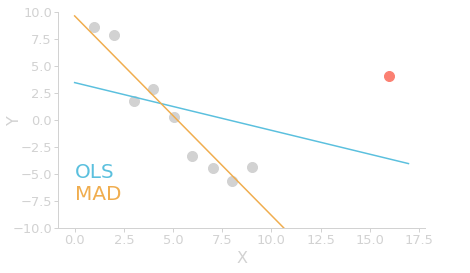

In [67]:
data = pd.DataFrame({
    "x": [0.9912101, 1.991552, 2.9944277, 3.9939117, 5.031269, 5.9847775, 7.0094004, 7.9858966, 8.99735, 15.969228],
    "y": [8.55867, 7.807588, 1.7461299, 2.8335004, 0.2770068, -3.308909, -4.4189773, -5.66825, -4.4139504, 4.072536]
    })

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.2, 0.85, 0.75])
ax2 = ax1.twinx()

for ax in [ax1]:
    ax.scatter(data.x.iloc[:-1], data.y.iloc[:-1], s=100, c=colors["lightgray"])
    ax.scatter(data.x.iloc[-1], data.y.iloc[-1], s=100, c="#fb8072")
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=2)
    #ax.set_xlim(0, 100)
    ax.set_ylim(-10, 10)
    ax.set_ylabel("Y", size=16, color=colors["lightgray"], ha="center", labelpad=-10)
    ax.set_xlabel("X", size=16, color=colors["lightgray"], ha="center")
    
    xfit = [data.x.min()-1, data.x.max()+1]
    params = np.polyfit(data.x, data.y, 1)
    ax.plot(xfit, np.polyval(params, xfit), color=colors["blue"])
    ax.text(0, ax.set_ylim()[0]+(ax.set_ylim()[1] - ax.set_ylim()[0])*0.3,
            "OLS", size=20, color=colors["blue"], ha="left", va="top")
    
for ax in [ax2]:
    ax.axis("off")
    ax.set_ylim(ax1.get_ylim())
    
    from sklearn import linear_model
    # Robustly fit linear model with RANSAC algorithm
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
    model_ransac.fit(data.x.values.reshape(-1, 1), data.y.values.reshape(-1, 1))
    
    ax.plot(xfit, model_ransac.predict(np.array(xfit).reshape(-1, 1)), color=colors["orange"])
    ax.text(0, ax.set_ylim()[0]+(ax.set_ylim()[1] - ax.set_ylim()[0])*0.2,
            "MAD", size=20, color=colors["orange"], ha="left", va="top")

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/regression-outliers.svg", transparent=True)



# Residuals exploration

In [68]:
data = pd.read_excel("data-src/residuals-exploration.xlsx")

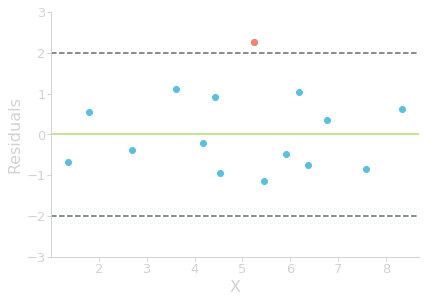

In [113]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.12, 0.85, 0.85])

for ax in [ax1]:
    ax.plot(data.x1, data.y1, "o", c=colors["blue"])
    ax.plot(data.x1.iloc[7], data.y1.iloc[7], "o", c="#fb8072")
    ax.axhline(0, ls="-", color="#b3de69")
    ax.axhline(2, ls="--", color=colors["gray"])
    ax.axhline(-2, ls="--", color=colors["gray"])
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=2)
    #ax.set_xlim(0, 100)
    ax.set_ylim(-3, 3)
    ax.set_ylabel("Residuals", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("X", size=16, color=colors["lightgray"], ha="center")
    

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/regression-residuals-exploration-1.svg", transparent=True)

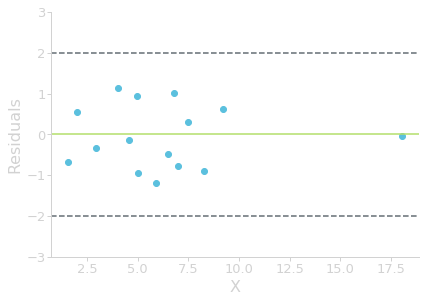

In [114]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.12, 0.85, 0.85])

for ax in [ax1]:
    ax.plot(data.x2, data.y2, "o", c=colors["blue"])
    #ax.plot(data.x1.iloc[7], data.y1.iloc[7], "o", c="#fb8072")
    ax.axhline(0, ls="-", color="#b3de69")
    ax.axhline(2, ls="--", color=colors["gray"])
    ax.axhline(-2, ls="--", color=colors["gray"])
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=2)
    #ax.set_xlim(0, 100)
    ax.set_ylim(-3, 3)
    ax.set_ylabel("Residuals", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("X", size=16, color=colors["lightgray"], ha="center")
    

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/regression-residuals-exploration-2.svg", transparent=True)

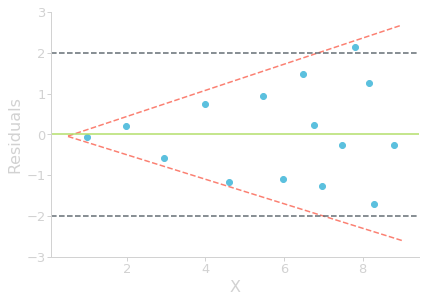

In [115]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.12, 0.85, 0.85])

for ax in [ax1]:
    ax.plot(data.x3, data.y3, "o", c=colors["blue"])
    xfit = np.array([0.5, 9])
    ax.plot(xfit, np.polyval([0.32, -0.2], xfit), ls="--", color="#fb8072")
    ax.plot(xfit, np.polyval([-0.3, 0.1], xfit), ls="--", color="#fb8072")
    ax.axhline(0, ls="-", color="#b3de69")
    ax.axhline(2, ls="--", color=colors["gray"])
    ax.axhline(-2, ls="--", color=colors["gray"])
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=2)
    #ax.set_xlim(0, 100)
    ax.set_ylim(-3, 3)
    ax.set_ylabel("Residuals", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("X", size=16, color=colors["lightgray"], ha="center")
    

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/regression-residuals-exploration-3.svg", transparent=True)

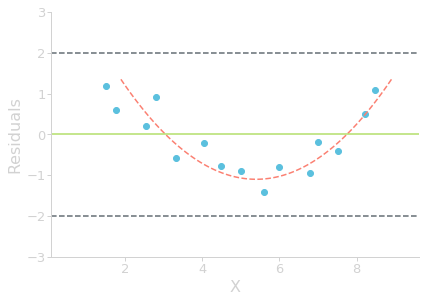

In [116]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.14, 0.12, 0.85, 0.85])

for ax in [ax1]:
    ax.plot(data.x4, data.y4, "o", c=colors["blue"])
    xfit = np.linspace(-3.5, 3.5, 100)
    ax.plot(xfit+5.4, (0.2*xfit**2)-1.1, ls="--", color="#fb8072")
    ax.axhline(0, ls="-", color="#b3de69")
    ax.axhline(2, ls="--", color=colors["gray"])
    ax.axhline(-2, ls="--", color=colors["gray"])
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=2)
    ax.set_xlim(0.1, 9.6)
    ax.set_ylim(-3, 3)
    ax.set_ylabel("Residuals", size=16, color=colors["lightgray"], ha="center")
    ax.set_xlabel("X", size=16, color=colors["lightgray"], ha="center")
    

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/regression-residuals-exploration-4.svg", transparent=True)

# Shoe Size and Height

In [8]:
data = pd.read_excel("data-src/shoesize.xls", index_col=0)

In [9]:
data.head()

,Gender,Size,Height
Index,,,
1,F,5.5,60.0
2,F,6.0,60.0
3,F,7.0,60.0
4,F,8.0,60.0
5,F,8.0,60.0


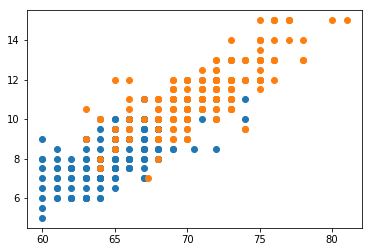

In [12]:
plt.plot(data[data.Gender=="F"].Height, data[data.Gender=="F"].Size, "o")
plt.plot(data[data.Gender=="M"].Height, data[data.Gender=="M"].Size, "o")

Coefficients: 
 [[ 0.42727575]]
Mean squared error: 1.03
Variance score: 0.76


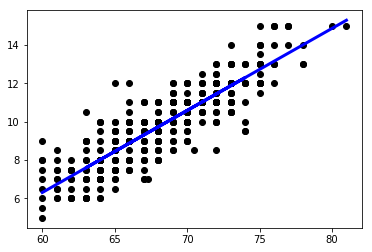

In [33]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(data.Height.values.reshape(-1, 1), data.Size.values.reshape(-1, 1))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(data.Height.values.reshape(-1, 1)) - data.Size.values.reshape(-1, 1)) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(data.Height.values.reshape(-1, 1), data.Size.values.reshape(-1, 1)))

# Plot outputs
plt.scatter(data.Height.values.reshape(-1, 1), data.Size.values.reshape(-1, 1),  color='black');
plt.plot(data.Height.values.reshape(-1, 1), regr.predict(data.Height.values.reshape(-1, 1)), color='blue',
         linewidth=3);



In [34]:
regr.predict(68.9)

array([[ 10.11269886]])